## Demonstration of the Shyft Timseries API convolve_w function

### ts.convolve_w(weights, convolve_policy) function

In [1]:
# first you should import the third-party python modules which you'll use later on
# the first line enables that figures are shown inline, directly in the notebook
%pylab inline
import os
from os import path
import sys
from matplotlib import pyplot as plt
import datetime
# set the path for your shyft build
# this should point to the directory that is created
# when you clone shyft, assuming you have built shyft
# there and not installed it to your system python
shyft_path = os.path.abspath("../../../shyft")
sys.path.insert(0, shyft_path)
import numpy as np
# you could achieve the same by setting a PYTHONPATH

Populating the interactive namespace from numpy and matplotlib


In [4]:
from shyft.api import Calendar
from shyft.api import deltahours
from shyft.api import TimeAxis
from shyft.api import point_interpretation_policy as fx_policy
from shyft.api import DoubleVector
from shyft.api import TsVector
from shyft.api import TimeSeries
from shyft.api import convolve_policy

from shyft.orchestration import plotting as splt
from scipy import signal

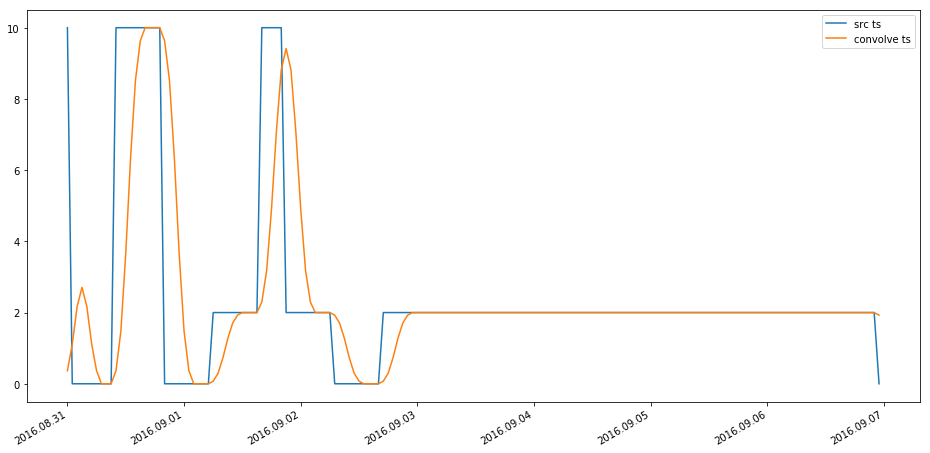

In [5]:
# demo partition_by and percentiles function

utc = Calendar()
t0 = utc.time(2016, 9, 1)
dt = deltahours(1)
n = 7*24

ta = TimeAxis(t0, dt, n)

# generate a source ts, with some spikes, to demonstrate the response of the filter
ts_values = np.arange(n)
ts_values[:]=0.0
ts_values[0]=10.0
ts_values[10:20] = 10.0
ts_values[30:-1] = 2.0
ts_values[40:45] = 10.0
ts_values[55:65] = 0.2

ts = TimeSeries(ta=ta,values=DoubleVector.from_numpy(ts_values),point_fx=fx_policy.POINT_AVERAGE_VALUE)

weights = signal.gaussian(7, std=1.5) # just a gauss bell
weights = DoubleVector.from_numpy(weights/weights.sum()) # ensure sum of weights are 1.0

cts = ts.convolve_w(weights,convolve_policy.USE_ZERO) # in the first n-1 steps, fill in with zero

# now this is done, - we can now plot the results
common_timestamps = [datetime.datetime.utcfromtimestamp(p.start) for p in ta]
fig,ax=plt.subplots(figsize=(16,8))
splt.set_calendar_formatter(utc)

plt.plot(common_timestamps,ts.values.to_numpy(), label='src ts') 
plt.plot(common_timestamps,cts.values.to_numpy(), label='convolve ts')
plt.legend()